This exmaple will show you how to interpret anomalies in **multivariate** *time-series* samples.

Here we use LSTM model with a network anomaly detection dataset, CIC-IDS2017.


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

# Prepare the multivariate LSTM model

In [2]:
# Train Deeplog anomaly detection model
import numpy as np
import torch
from lstm_multivariate import train, test, test_from_iter
train_feat = np.load('./data/train_feat.npy')
import sys
sys.path.append('../../deepaid/')
from utils import validate_by_rmse, Normalizer
normer = Normalizer(train_feat.shape[-1],online_minmax=False)
train_feat = normer.fit_transform(train_feat)
model, thres = train(train_feat)
torch.save({'net':model,'thres':thres},'./save/lstm_multivariate.pth.tar')

SHAPE (49996, 5, 100) (49996, 100)
epoch:0/0 |Loss: 0.03431280702352524
epoch:0/10 |Loss: 0.017422569915652275
epoch:0/20 |Loss: 0.010936393402516842
epoch:0/30 |Loss: 0.00878947600722313
epoch:0/40 |Loss: 0.007769020739942789
epoch:0/50 |Loss: 0.005134322680532932
epoch:0/60 |Loss: 0.00455947732552886
epoch:0/70 |Loss: 0.0035101165995001793
epoch:0/80 |Loss: 0.002833236940205097
epoch:0/90 |Loss: 0.0032944041304290295
epoch:0/100 |Loss: 0.0027784877456724644
epoch:0/110 |Loss: 0.0025630088057368994
epoch:0/120 |Loss: 0.002463193377479911
epoch:0/130 |Loss: 0.002179180970415473
epoch:0/140 |Loss: 0.0024447545874863863
epoch:0/150 |Loss: 0.0016492271097376943
epoch:0/160 |Loss: 0.0017655305564403534
epoch:0/170 |Loss: 0.001525384490378201
epoch:0/180 |Loss: 0.001522636623121798
epoch:0/190 |Loss: 0.0015013834927231073
epoch:1/0 |Loss: 0.0012528944062069058
epoch:1/10 |Loss: 0.001584244309924543
epoch:1/20 |Loss: 0.0013055931776762009
epoch:1/30 |Loss: 0.0012598654720932245
epoch:1/40 |L

epoch:10/30 |Loss: 0.00018292419554200023
epoch:10/40 |Loss: 0.0002076830278383568
epoch:10/50 |Loss: 0.00022652938787359744
epoch:10/60 |Loss: 0.00020724871137645096
epoch:10/70 |Loss: 0.00014658634609077126
epoch:10/80 |Loss: 0.000228883174713701
epoch:10/90 |Loss: 0.0001748044160194695
epoch:10/100 |Loss: 0.0002357161429245025
epoch:10/110 |Loss: 0.00017275549180340022
epoch:10/120 |Loss: 0.00021926745830569416
epoch:10/130 |Loss: 0.0002459353127051145
epoch:10/140 |Loss: 0.0001499360369052738
epoch:10/150 |Loss: 0.0002017083897953853
epoch:10/160 |Loss: 0.00021209205442573875
epoch:10/170 |Loss: 0.0002305038651684299
epoch:10/180 |Loss: 0.00017054840282071382
epoch:10/190 |Loss: 0.00016631459584459662
epoch:11/0 |Loss: 0.0002034566568909213
epoch:11/10 |Loss: 0.00022637660731561482
epoch:11/20 |Loss: 0.0002269077958771959
epoch:11/30 |Loss: 0.0002354518073843792
epoch:11/40 |Loss: 0.0001955255283974111
epoch:11/50 |Loss: 0.00020354877051431686
epoch:11/60 |Loss: 0.00016671027697157

max AD score 0.1656928
thres: 0.1656928


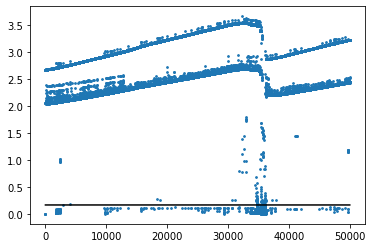

TPR: 0.9999179167265191 |FPR: 0.11032308904649331


In [3]:
# Validate the performance of trained model
import matplotlib.pyplot as plt
test_feat = np.load('./data/test_feat_cicddos.npy')
test_label = np.load('./data/test_label_cicddos.npy')
test_feat = normer.transform(test_feat)
rmse_vec = test(model,thres, test_feat)
plt.scatter(np.linspace(0,len(test_feat)-1,len(test_feat)),rmse_vec,s=3)  
plt.plot(np.linspace(0,len(test_feat)-1,len(test_feat)),[thres]*len(test_feat),c='black')
plt.show()
pred = validate_by_rmse(rmse_vec,thres,test_label)

# Interpret your interested anomaly in four steps 

Successfully Initialize <Multivariate Timeseries Interptreter> for Model <LSTM_multivariate>
Finish Interpretation after 99 steps (Final loss: 0.20, Time elasped: 0.27s)

Visualize Interpretation (Table View)
+---------------------+------------------+-------+--------------------+
| Feature Description | Value in Anomaly | comp. | Value in Reference |
+---------------------+------------------+-------+--------------------+
|  HH_jit_0.01_weight |    99352.606     |   >   |     25919.891      |
|   HH_0.01_weight_0  |    99352.606     |   >   |     25919.891      |
|  MI_dir_0.01_weight |    99653.476     |   >   |     29029.789      |
|  HH_jit_0.1_weight  |    10426.123     |   >   |      5304.663      |
|   HH_0.1_weight_0   |    10426.123     |   >   |      5304.663      |
+---------------------+------------------+-------+--------------------+

Visualize Interpretation (Plot View)


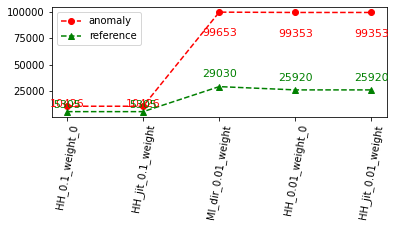


Visualize Interpretation (HeatMap View)


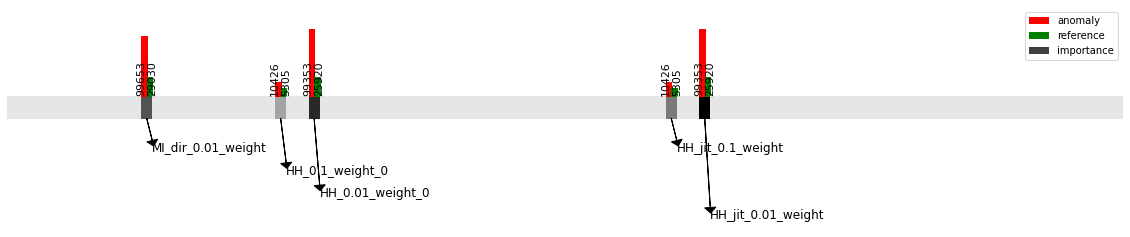

{'index_inc': array([24, 59, 12, 27, 62]), 'value_inc': array([0.06950221, 0.0694307 , 0.16828851, 0.1656791 , 0.16557503],
      dtype=float32)}


In [4]:
"""Step 1: Load your model"""
from lstm_multivariate import LSTM_multivariate
from utils import Normalizer
model_dict = torch.load('save/lstm_multivariate.pth.tar')
model = model_dict['net']
thres = model_dict['thres']

"""Step 2: Find an anomaly you are interested in"""
anomaly = test_feat[np.argsort(rmse_vec)[-100]]
from utils import multiLSTM_seqformat
idx = 100
seq_feat, interp_feat = multiLSTM_seqformat(test_feat, seq_len = 5, index=idx)

"""Step 3: Create a DeepAID multivariate Time-Series Interpreter"""
import sys
sys.path.append("../../deepaid/interpreters/")
from timeseries_multivariate import MultiTimeseriesAID 
feature_desc = np.load('data/AI_feature_name.npy') # feature_description
my_interpreter = MultiTimeseriesAID(model,thres,input_size=100,feature_desc=feature_desc)

"""Step 4: Interpret your anomaly and show the result"""
interpretation = my_interpreter(seq_feat)
my_interpreter.show_table(interp_feat,interpretation, normer)
my_interpreter.show_plot(interp_feat, interpretation, normer)
my_interpreter.show_heatmap(interp_feat,interpretation, normer)
print(interpretation)

**Note that, in multivariate time series, we only find influential dimensions in the last time point**